In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    

In [6]:
# Importing dataset
data = pd.read_csv("prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [7]:
df.head

<bound method NDFrame.head of               date symbol        open       close         low        high  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           volume  
0       2163600.0  
1    

In [8]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [9]:
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


<AxesSubplot:>

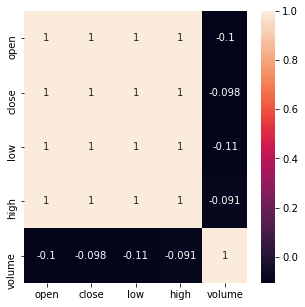

In [10]:
df = df[df['symbol']=='AAP']   # Choosin stock values for any company 

cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [11]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [12]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [13]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [14]:
df.shape

(1762, 4)

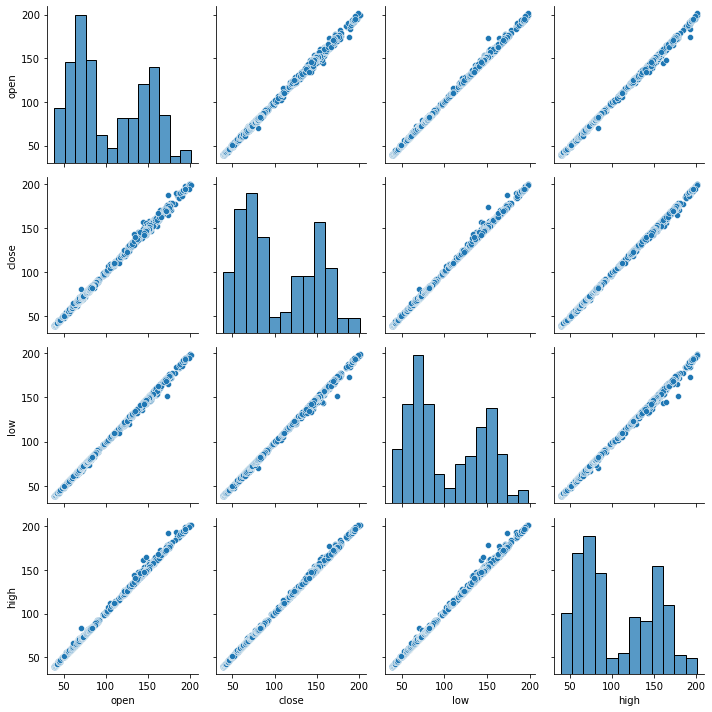

In [15]:
sns.pairplot(df)
plt.tight_layout()

In [16]:
X = df.drop(['close'], axis=1)
y = df['close']


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [19]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [20]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [21]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


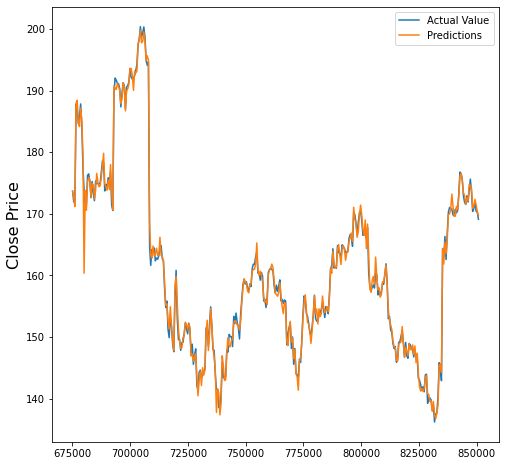

In [22]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [23]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [24]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 0s 13ms/step - loss: 6058.0898 - val_loss: 22085.3789
Epoch 2/70
36/36 [==============================] - 0s 3ms/step - loss: 6042.1191 - val_loss: 22000.1816
Epoch 3/70
36/36 [==============================] - 0s 3ms/step - loss: 5971.5151 - val_loss: 21581.2148
Epoch 4/70
36/36 [==============================] - 0s 3ms/step - loss: 5709.3359 - val_loss: 20189.5586
Epoch 5/70
36/36 [==============================] - 0s 3ms/step - loss: 5026.8447 - val_loss: 16937.1699
Epoch 6/70
36/36 [==============================] - 0s 3ms/step - loss: 3715.6396 - val_loss: 11440.8018
Epoch 7/70
36/36 [==============================] - 0s 3ms/step - loss: 1939.9197 - val_loss: 5067.3408
Epoch 8/70
36/36 [==============================] - 0s 3ms/step - loss: 513.2097 - val_loss: 1162.1290
Epoch 9/70
36/36 [==============================] - 0s 3ms/step - loss: 55.5835 - val_loss: 287.5471
Epoch 10/70
36/36 [==============================] - 0s 3ms/s

In [25]:
# Prediction

y_pred_2 = model_2.predict(X_test)

In [26]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.268616
675608,171.919998,172.583145
676105,172.000000,170.806641
676602,187.789993,179.757645
677099,187.029999,188.347824


In [27]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9880239435387541


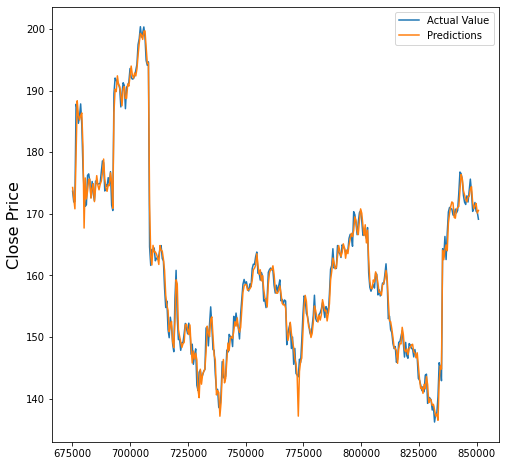

In [28]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [29]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [31]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 1s 18ms/step - loss: 5616.7729 - val_loss: 13262.5615
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 618.9542 - val_loss: 231.5805
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 33.3035 - val_loss: 125.1509
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 10.3080 - val_loss: 45.9382
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 3.8315 - val_loss: 15.8462
Epoch 6/100
36/36 [==============================] - 0s 9ms/step - loss: 1.3985 - val_loss: 4.2207
Epoch 7/100
36/36 [==============================] - 0s 10ms/step - loss: 0.6735 - val_loss: 2.4944
Epoch 8/100
36/36 [==============================] - 0s 10ms/step - loss: 0.5205 - val_loss: 1.9433
Epoch 9/100
36/36 [==============================] - 0s 10ms/step - loss: 0.4862 - val_loss: 1.7641
Epoch 10/100
36/36 [==============================] - 0s 10ms/step - loss: 0.4747 - val_

In [32]:
# Prediction

y_pred_3 = model_3.predict(X_test)

In [33]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.272675
675608,171.919998,172.653015
676105,172.000000,170.824615
676602,187.789993,179.713379
677099,187.029999,188.431229


In [34]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9886550732978341


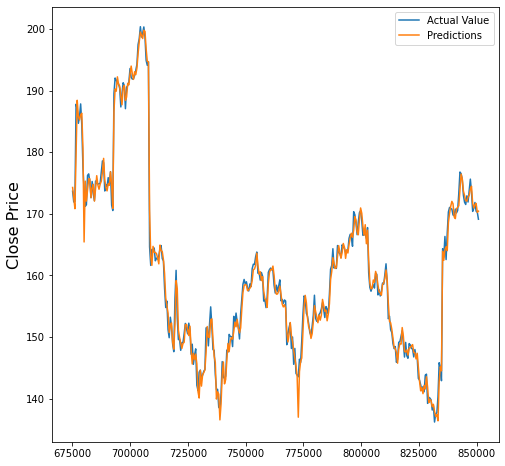

In [35]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

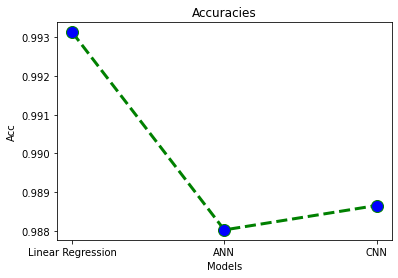

In [36]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

In [37]:
close = df.reset_index()['close']
close.head()

0    40.380001
1    40.139999
2    40.490002
3    40.480000
4    40.639999
Name: close, dtype: float64

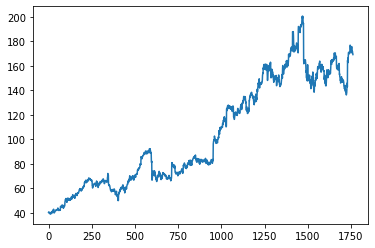

In [38]:
plt.plot(close)
plt.show()

In [39]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [40]:
X[:5]


array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [41]:
y[:5]

array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


PREDICTION

In [44]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

LSTM

In [45]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [46]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [47]:
# Model Training

model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 22ms/step - loss: 3582.9121 - val_loss: 242.1110
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 91.0404 - val_loss: 65.4814
Epoch 3/100
35/35 [==============================] - 0s 14ms/step - loss: 20.0793 - val_loss: 37.0241
Epoch 4/100
35/35 [==============================] - 0s 14ms/step - loss: 16.3476 - val_loss: 55.8733
Epoch 5/100
35/35 [==============================] - 0s 14ms/step - loss: 15.8182 - val_loss: 37.0827
Epoch 6/100
35/35 [==============================] - 0s 14ms/step - loss: 15.2561 - val_loss: 37.2555
Epoch 7/100
35/35 [==============================] - 0s 14ms/step - loss: 15.1445 - val_loss: 31.5280
Epoch 8/100
35/35 [==============================] - 0s 14ms/step - loss: 15.7271 - val_loss: 30.3422
Epoch 9/100
35/35 [==============================] - 0s 14ms/step - loss: 15.3895 - val_loss: 32.9578
Epoch 10/100
35/35 [==============================] - 0s 13ms/step - loss: 14.6

In [48]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

In [49]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,182.825592
1,185.770004,184.215759
2,187.839996,185.699615
3,184.449997,187.240021
4,177.539993,186.847382


In [50]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))


Accuracy score of the predictions: 0.9141168818901753


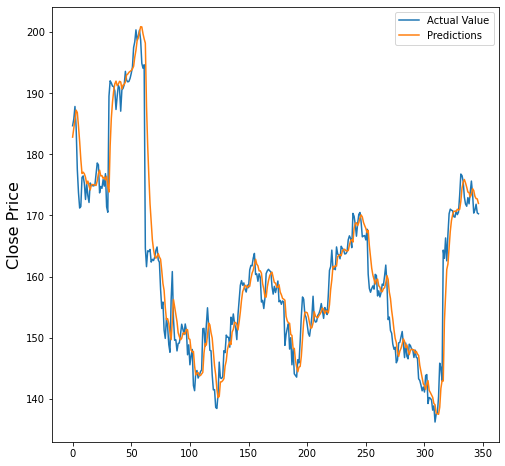

In [51]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

ANN

In [52]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 0s 10ms/step - loss: 6283.6011 - val_loss: 22402.6602
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 6247.4966 - val_loss: 21996.7070
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 5973.4585 - val_loss: 19329.2422
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 4839.1699 - val_loss: 10995.8252
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 2375.1143 - val_loss: 841.5115
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 436.3352 - val_loss: 1746.8901
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 229.1333 - val_loss: 1581.4843
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: 217.0923 - val_loss: 1358.3566
Epoch 9/100
35/35 [==============================] - 0s 6ms/step - loss: 208.4489 - val_loss: 1315.5291
Epoch 10/100
35/35 [==============================] - 0

In [53]:
# Prediction

y_pred_2 = model_2.predict(X_test)

In [54]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.8084811086309676


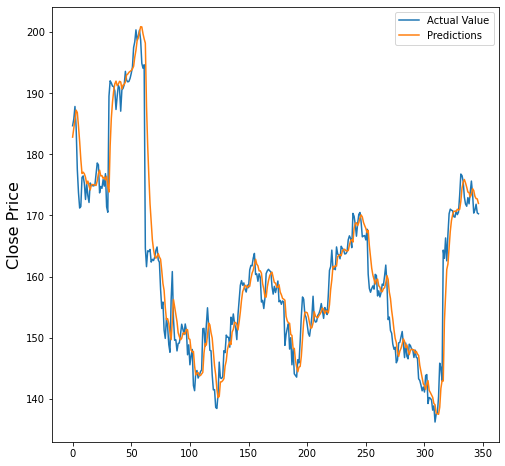

In [55]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

CNN

In [56]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 20ms/step - loss: 3050.4402 - val_loss: 355.4427
Epoch 2/100
35/35 [==============================] - 0s 13ms/step - loss: 92.4653 - val_loss: 185.1123
Epoch 3/100
35/35 [==============================] - 0s 13ms/step - loss: 19.1289 - val_loss: 41.1772
Epoch 4/100
35/35 [==============================] - 0s 13ms/step - loss: 15.7205 - val_loss: 36.2264
Epoch 5/100
35/35 [==============================] - 0s 14ms/step - loss: 15.6427 - val_loss: 49.0590
Epoch 6/100
35/35 [==============================] - 0s 13ms/step - loss: 15.5235 - val_loss: 35.4571
Epoch 7/100
35/35 [==============================] - 0s 14ms/step - loss: 15.3305 - val_loss: 46.0119
Epoch 8/100
35/35 [==============================] - 0s 12ms/step - loss: 14.7007 - val_loss: 33.1615
Epoch 9/100
35/35 [==============================] - 0s 13ms/step - loss: 15.1135 - val_loss: 42.8639
Epoch 10/100
35/35 [==============================] - 0s 13ms/step - loss: 14.

In [57]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

In [59]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,186.074783
1,185.770004,187.921707
2,187.839996,188.408966
3,184.449997,189.438705
4,177.539993,189.042984


In [60]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.8953441456138024


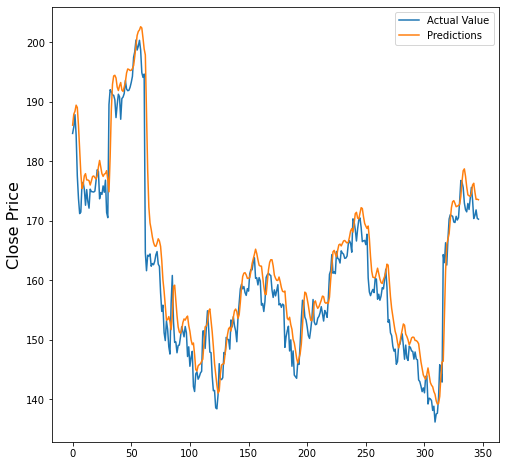

In [61]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()


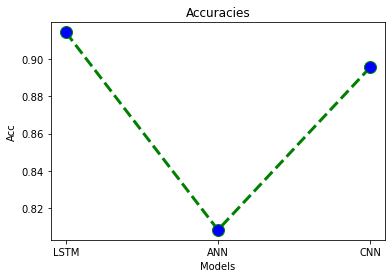

In [62]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()

In [ ]:
import anvil.server
anvil.server.connect("4RTYKRCMVT2YVHYUDN4GFOUY-H6OW7BDP2NK7WQ2P")